In [1]:
from glob import glob

In [15]:
image_files=glob("social-posts-dailyds/social-posts-dailyds/*.jpg")
text_files=glob("social-posts-dailyds/social-posts-dailyds/*.txt")
print(len(image_files))
print(len(text_files))

40
40


In [16]:
image_files[1]

'social-posts-dailyds/social-posts-dailyds\\10.jpg'

In [17]:
text_files[1]

'social-posts-dailyds/social-posts-dailyds\\10.txt'

In [19]:
documents = []

for i in range(1, len(image_files)+1):
    text_file  = f'./social-posts-dailyds/social-posts-dailyds/{i}.txt'
    image_file = f'./social-posts-dailyds/social-posts-dailyds/{i}.jpg'
    
    with open(text_file, "r", encoding="utf-8") as f:
        text = f.read()
    doc = {"text": text, "image":image_file}
    documents.append(doc)

In [20]:
documents[11]

{'text': 'Mixed precision training explained step-by-step.\n\nAlmost all models use this to speed up training.\n\nThe motivation is simple.\n\nTypical deep learning frameworks are really conservative when assigning data types. They usually allocate 64-bit or 32-bit to get higher precision.\n\nHowever, this precision involves additional memory utilization, which is not necessary every time. Thus, in most cases, we are not optimal at efficiently allocating memory.\n\nUsing lower-precision formats, like float16, can dramatically reduce memory footprint and speed up training since operations like matrix multiplication run much faster under smaller precision.\n\nTypical speedups can be anywhere between 2-4x, *without heavily comprising model accuracy.*',
 'image': './social-posts-dailyds/social-posts-dailyds/12.jpg'}

In [23]:
documents[13]

{'text': 'Here limitation about correlation is mentioned and some of the methods are discussed about that.',
 'image': './social-posts-dailyds/social-posts-dailyds/14.jpg'}

If you use KMeans all the time, read this:

Knowing an algorithm is just 20% knowledge. The rest 80% comes from understanding the practical limitations.

Here are a few limitations of KMeans that many overlook:
- It does not account for cluster variance (the spread in 2D, for instance)
- It can only produce globular clusters (no oval shapes in 2D, only circular)
- It only relies on distance-based measures to assign data points to clusters
↳ To understand better, consider two clusters in 2D, with A and B. Cluster A has a higher spread than B.
↳ Now consider a line that is mid-way between centroids of A and B → A .... | .... B.
↳ Although A has a higher spread, even if a point is even slightly right to the mid line, it will get assigned to cluster B.
↳ Ideally, however, cluster A should have a larger area of influence.
- It performs a hard assignment. Thus, there are no probabilistic estimates of each data point belonging to a cluster.

These limitations often make KMeans a non-ideal cho

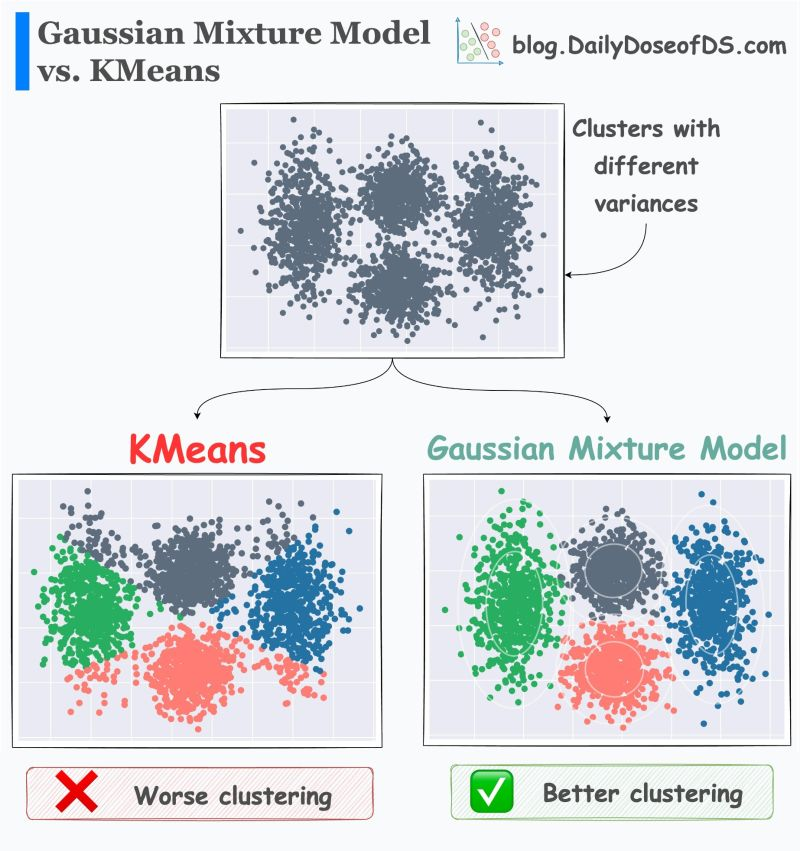

In [26]:
from PIL import Image
import random
from IPython.display import display

num = random.randint(0, len(documents)-1)
print(documents[num]["text"])
display(Image.open(documents[num]["image"]))


In [27]:
pip install fastembed

Note: you may need to restart the kernel to use updated packages.


In [30]:
from fastembed import TextEmbedding, ImageEmbedding

class EmbedData:
    def __init__(self,
                 documents,
                 text_model_name="Qdrant/clip-ViT-B-32-text",
                 image_model_name="Qdrant/clip-ViT-B-32-vision"):

        # Initialize text embedding model
        self.documents = documents
        self.text_model = TextEmbedding(model_name=text_model_name)
        self.text_embed_dim = self.text_model._get_model_description(text_model_name).dim
        
        # Initialize image embedding model
        self.image_model = ImageEmbedding(model_name=image_model_name)
        self.image_embed_dim = self.image_model._get_model_description(image_model_name).dim

    def embed_texts(self,texts):
        text_embeddings=list(self.text_model.embed(texts))
        return text_embeddings

    def embed_images(self,images):
        image_embeddings=list(self.image_model.embed(images))
        return image_embeddings

In [31]:
embeddata = EmbedData(documents)

embeddata.text_embeds  = embeddata.embed_texts([doc["text"] for doc in documents])

embeddata.image_embeds = embeddata.embed_images([doc["image"] for doc in documents])

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lenovo\AppData\Local\Temp\fastembed_cache\models--Qdrant--clip-ViT-B-32-vision. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.onnx:   0%|          | 0.00/352M [00:00<?, ?B/s]

2025-11-16 21:35:23.446 | ERROR    | fastembed.common.model_management:download_model:430 - Could not download model from HuggingFace: [WinError 1314] A required privilege is not held by the client: '..\\..\\blobs\\51e784459031491dbeff674ef789242c0f393355' -> 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\fastembed_cache\\models--Qdrant--clip-ViT-B-32-vision\\snapshots\\e0c24ed0fa57fa3e4f97f30de74c51d944036ace\\config.json' Falling back to other sources.
2025-11-16 21:35:23.447 | ERROR    | fastembed.common.model_management:download_model:452 - Could not download model from either source, sleeping for 3.0 seconds, 2 retries left.


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
import numpy as np

In [33]:
np.array(embeddata.text_embeds)

array([[-0.00478196,  0.02521464, -0.0595684 , ..., -0.08059194,
        -0.02418593,  0.01228002],
       [ 0.02167795, -0.01376178,  0.01594471, ..., -0.03696359,
        -0.04793457, -0.00111403],
       [-0.00744008,  0.01540474,  0.01275509, ..., -0.07251235,
        -0.03039219,  0.04412259],
       ...,
       [-0.01061978, -0.01621294, -0.00216255, ..., -0.09081446,
        -0.0033549 , -0.00257717],
       [ 0.01164328,  0.0552448 , -0.0567756 , ..., -0.01943809,
        -0.02235425,  0.04530266],
       [ 0.02053607,  0.03772461, -0.08860212, ..., -0.0741692 ,
        -0.01034645,  0.04060551]], dtype=float32)

In [34]:
np.array(embeddata.image_embeds)

array([[-0.02792615,  0.03920897, -0.00545189, ...,  0.04881151,
        -0.01763976,  0.0182847 ],
       [ 0.03408948, -0.03634832, -0.05058835, ...,  0.07212476,
        -0.02823342, -0.00792721],
       [-0.02562222, -0.02942549,  0.00659264, ...,  0.09438888,
        -0.00326677,  0.06208971],
       ...,
       [ 0.02076808, -0.02034907,  0.02650898, ...,  0.08335622,
        -0.0045543 , -0.00625279],
       [ 0.04360874, -0.00153317, -0.0119834 , ...,  0.06646298,
        -0.02368143,  0.04685692],
       [ 0.05488853,  0.03909653, -0.030728  , ...,  0.11019371,
         0.00972911, -0.0113189 ]], dtype=float32)

In [35]:
from qdrant_client import QdrantClient, models

class QdrantVDB:
    def __init__(self,
                 collection_name,
                 image_dim,
                 text_dim,
                 url="http://localhost:6333"):

        self.image_dim = image_dim
        self.text_dim = text_dim
        self.collection_name = collection_name
        self.client = QdrantClient(url=url, prefer_grpc=True)

    def create_collection(self):
        if not self.client.collection_exists(self.collection_name):
        
            print(f"Creating collection '{self.collection_name}'...")
        
            self.client.create_collection(
                collection_name=self.collection_name,
                
                vectors_config={
                    "image": models.VectorParams(size=self.image_dim,
                                                 distance=models.Distance.COSINE),
                    "text": models.VectorParams(size=self.text_dim,
                                                distance=models.Distance.COSINE),
                }
            )
        
            print(f"Collection '{self.collection_name}' created successfully.")
        
        else:
            print(f"Collection '{self.collection_name}' already exists.")
    
    def upload_embeddings(self, embeddata):

        print(f"Uploading points to collection '{self.collection_name}'...")
        
        points = []
        
        for idx, doc in enumerate(embeddata.documents):
            point = models.PointStruct(id=idx,  # Unique ID for each point
                                       vector={
                                           "text": embeddata.text_embeds[idx], 
                                           "image": embeddata.image_embeds[idx]
                                           },
                                       payload=doc  # Original image and its caption
                                       )
        
            points.append(point)

        self.client.upload_points(collection_name=self.collection_name, points=points)
        
        print(f"Uploaded {len(points)} points to collection '{self.collection_name}'.")


In [36]:
vector_db = QdrantVDB("linkedin-posts",
                      embeddata.image_embed_dim,
                      embeddata.text_embed_dim)

vector_db.create_collection()

vector_db.upload_embeddings(embeddata)

Creating collection 'linkedin-posts'...
Collection 'linkedin-posts' created successfully.
Uploading points to collection 'linkedin-posts'...
Uploaded 40 points to collection 'linkedin-posts'.


In [37]:
class Retriever:

    def __init__(self, vector_db, embeddata):
        
        self.vector_db = vector_db
        self.embeddata = embeddata

    def search(self, query, limit=3):
        query_embedding = list(self.embeddata.embed_texts(query))[0]

        result = self.vector_db.client.search(
                collection_name=self.vector_db.collection_name,
                query_vector=("image", query_embedding),
                with_payload=["image", "text"], 
                limit=limit
            )

        return result

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\2378003010.py:11: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


dict_keys(['text', 'image'])
A single frame summary of 6 types of clustering algorithms.

Centroid-based is the most common class of clustering. Yet, there's a whole world of algorithms beyond that, which we all should be aware of.

- Centroid-based: Cluster data points based on proximity to centroids.

- Connectivity-based: Cluster points based on proximity between clusters.

- Density-based: Cluster points based on their density. It is more robust to clusters with varying densities and shapes than centroid-based clustering.

- Graph-based: Cluster points based on graph distance.

- Distribution-based: Cluster points based on their likelihood of belonging to the same distribution.

- Compression-based: Transform data to a lower dimensional space and then perform clustering



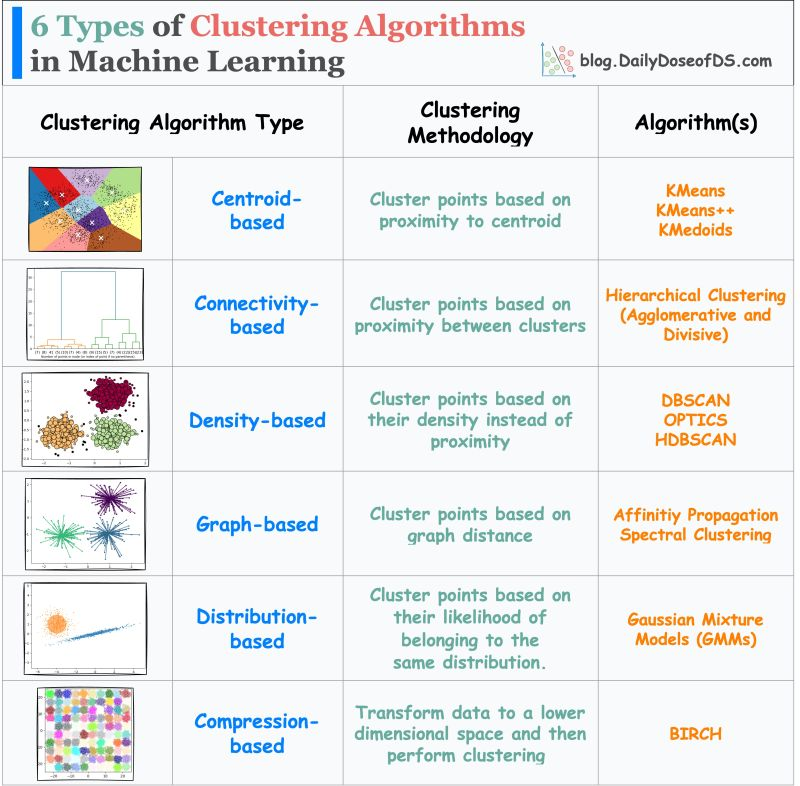

In [40]:
query = "What are some examples of Graph-based clustering algorithms?"

result = Retriever(vector_db, embeddata).search(query, limit=1)

for i in result:
    print(i.payload.keys())


for i in result:
    print(i.payload["text"])
    
    display(PIL.Image.open(i.payload["image"]))

In [47]:
import ollama

class RAG:

    def __init__(self,
                 retriever,
                 llm_name="llama3.2-vision:latest"):
        
        self.llm_name = llm_name
        self.retriever = retriever
        self.qa_prompt_tmpl_str = """Context information is below.
                                     ---------------------
                                     {context}
                                     ---------------------

                                     Some images may also be available to you
                                     for answering the question better. You have
                                     to undersatnd those images thoroughly and 
                                     extra all relevant information that might 
                                     help you answer the query better.

                                     ---------------------
                                     
                                     Given the context information above I want you
                                     to think step by step to answer the query in a
                                     crisp manner, incase case you don't know the
                                     answer say 'I don't know!'
                                     
                                     ---------------------
                                     
                                     Query: {query}
                                     
                                     ---------------------
                                     Answer: """
    
    def generate_context(self, query):    
        result = self.retriever.search(query)
        context = [dict(data) for data in result]
        combined_prompt = []

        for entry in context:
            context = entry["payload"]["text"]

            combined_prompt.append(context)

        return "\n\n---\n\n".join(combined_prompt), result
    
    def query(self, query):
        context, result = self.generate_context(query=query)
        
        prompt = self.qa_prompt_tmpl_str.format(context=context,
                                                query=query)

        messages = [
                {
                    "role": "user",
                    "content": prompt,
                    "images": [result[0].payload['image']]
                },
            ]
        
        response = ollama.chat(model=self.llm_name, messages=messages)
    
        return response

In [42]:
retriever = Retriever(vector_db, embeddata)

rag = RAG(retriever)

In [48]:
query = """What are some examples of
           Graph-based clustering algorithms?"""

response = rag.query(query)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\2378003010.py:11: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


In [49]:
from IPython.display import Markdown,display
display(Markdown(response.message.content))

1) k-means (the most basic and commonly used graph-based clustering algorithms), 
(2) Agglomerative clustering (bottom-up approach, which starts with each object in its own cluster and gradually merges clusters as it finds similar objects), 
(3) Spectral clustering (uses the structure of the graph to find clusters by exploiting the eigenvectors of the graph's Laplacian), 
(4) Density-based clustering algorithms (finds clusters based on the density of points in the feature space). Some examples include DBSCAN and density peak clustering.
These are just a few examples, and there are many more cluster algorithms out there with different assumptions and strengths.

In [50]:
query = """Are there any ways to
           speed up native Python code?"""

response = rag.query(query)

from IPython.display import Markdown,display
display(Markdown(response.message.content))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\2378003010.py:11: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


 Yes, there are several ways to speed up native Python code. Here's a comprehensive guide on how to do so:

Without further ado, let's explore some of the most effective methods for accelerating your Python code:
1. Cython: As we saw in the image, Cython converts Python code into C, which is then compiled and executed. This eliminates the need for a Python interpreter, resulting in significant speed improvements.
2. Numba: Numba is a just-in-time (JIT) compiler that compiles Python code to machine code at run time. This also speeds up your code by removing the need for interpretation.
3. PyPy: PyPy is another JIT compilation tool that compiles Python code to C or C++, which can further speed up your program.
4. Optimizing loops and recursion: In some cases, optimizing loops, recursive calls, and other complex constructs can lead to noticeable performance improvements.
5. Using native extensions: Writing extension modules in C, C++, or other languages that interface with Python can greatly speed up specific tasks by avoiding Python's dynamic nature.

Please note that the methods above may not be applicable to all scenarios and may require significant refactoring efforts. In such cases, it's crucial to profile your code and identify bottlenecks before optimizing.

If you write native Python code, here's how to speed it up over 50x in 4 simple steps ⚡️

Python’s default interpreter (CPython) is slow primarily because of its dynamicity.
↳ After defining a variable of a specific type, it can be changed to some other type.

But these dynamic manipulations come at the cost of run time and many memory overheads.

Instead, use the Cython module. It converts Python code into C, which is fast and efficient.

Steps to use the Cython module:
1) Load the Cython module: %load_ext Cython
2) Add the Cython magic command
3) When using functions, specify the parameter data type
4) Define every variable using the “cdef” keyword and specify its data type.

Done!

Once done, the code will run at native machine code speed.

The speedup is evident from the image below:
- Python code is slow.
- But Cython provides over a 100x speedup.

Note: The sample code is just for demonstration purposes. I know it can be implemented with NumPy and a for-loop can be entirely elimi

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\2378003010.py:11: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


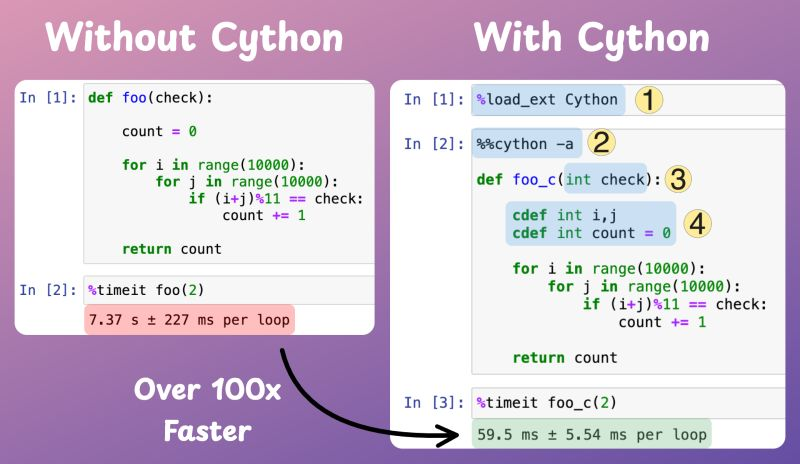

In [51]:
query = """Are there any ways to
           speed up native Python code?"""

result=retriever.search(query,limit=1)

for i in result:
    print(i.payload["text"])
    display(PIL.Image.open(i.payload["image"]))

In [52]:
query = """What is the mathematics behind the
           kernel trick? Show me a step-by-step
           explanation with the polynomial
           kernel and two 2D vectors."""

response = rag.query(query)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\2378003010.py:11: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


In [53]:
from IPython.display import Markdown,display
display(Markdown(response.message.content))


Follow these steps:
1) Choose a kernel function, e.g., the one in the image with (1+X**Y)².
2) Expand the 2D vectors into a high-dimensional space: X = [x1, x2] and Y = [y1, y2] become X = [X1, X2, X3, ... Xk] and Y = [Y1, Y2, Y3, ... Yk] where Xk and Yk are the dimensions of the feature spaces.
3) Compute the dot product between the two expanded vectors: (X**Y) = ∑ Xi * Yj.
4) The final result is given by: f(X, Y) = (1+X**Y)².

The visual representation in the image above will make it easier to grasp the concept of the kernel trick.